In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
import sklearn

In [2]:
iris = load_iris()
df=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.2, random_state=0)

<Axes: >

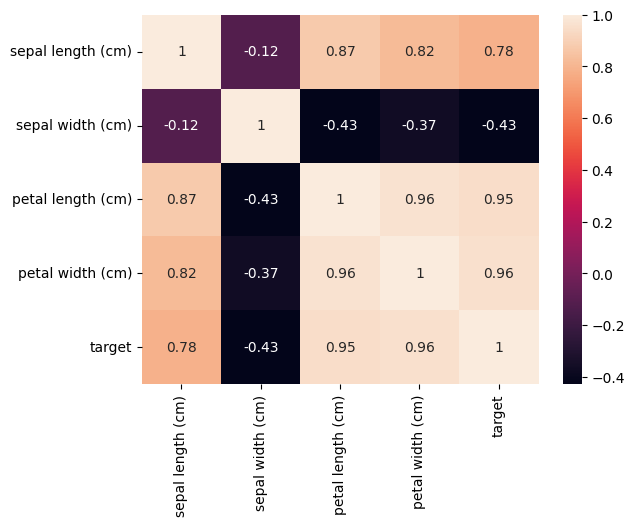

In [3]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [4]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [5]:
base_model = LogisticRegression(random_state=42)

ovr_model = OneVsRestClassifier(base_model)

ovr_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [6]:
y_pred = ovr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#Q2

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('weather.csv')
X = df[['Outlook','Temp','Humidity','Windy']]
y = df['Play']

FileNotFoundError: [Errno 2] No such file or directory: 'weather.csv'

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['Outlook', 'Temp', 'Humidity'])
    ])

X= preprocessor.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0
)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9833

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



#Q3

In [ ]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

data = pd.read_csv('BankNote_Authentication.csv')

print(data.head())

X = data[['variance', 'skewness', 'curtosis', 'entropy']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9855


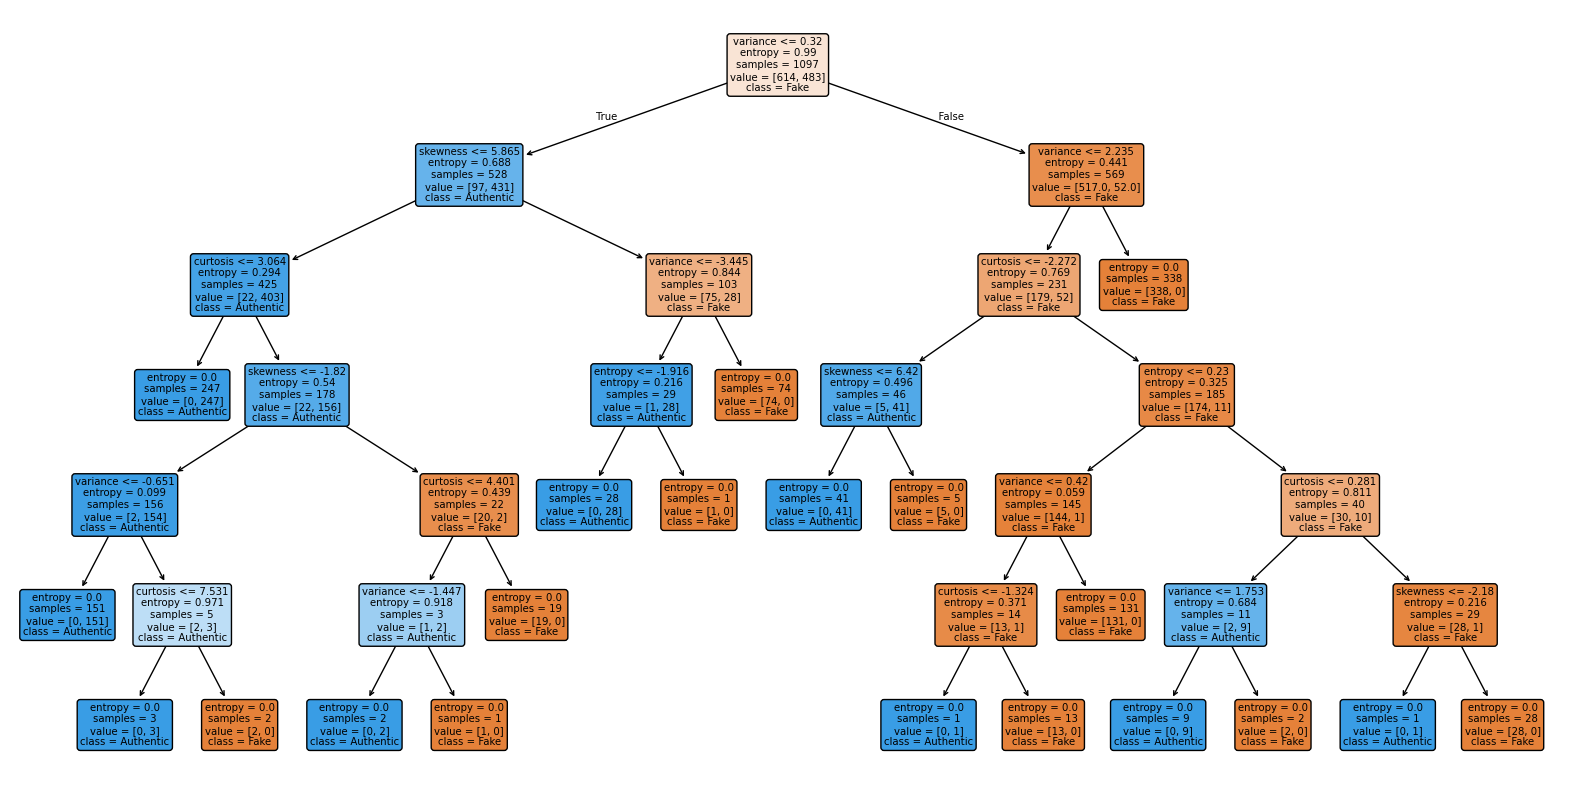

In [ ]:

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Fake', 'Authentic'], rounded=True)
plt.show()
